<a href="https://colab.research.google.com/github/jakeisthegoat/DS340W/blob/main/Model/SMOTEAdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection using SMOTE and AdaBoost Algorithms

## Load Libraries


In [1]:
# we want our plots to appear inside the notebook
%matplotlib inline 

# Misc Libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statistics
import glob
import requests
import seaborn as sns
from tqdm.notebook import tqdm

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# RUS Implementation
from imblearn.under_sampling import RandomUnderSampler

# SMOTE Implementation
from imblearn.over_sampling import SMOTE
from collections import Counter

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score, matthews_corrcoef
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import KFold

## Exploratory Data Analysis

In [2]:
# Load Data in from GitHub
url1 = "https://media.githubusercontent.com/media/jakeisthegoat/DS340W/main/data/creditcard.csv"
data = pd.read_csv(url1)

# Preview data
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
#Number of Transactions and columns
print(data.shape)

(284807, 31)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Looking for class imbalance 
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Looking for imbalance in transaction amounts
bins_1 = pd.cut(data['Amount'], [0, 100, 300,500 ,800 ,1000 ,1500])
data.groupby(bins_1)["Class"].value_counts().unstack()

Class,0,1
Amount,,
"(0, 100]",226139,335
"(100, 300]",38380,67
"(300, 500]",8891,28
"(500, 800]",4650,21
"(800, 1000]",1526,5
"(1000, 1500]",1600,6


In [7]:
# Split up predictors and response
X = data.drop("Class", axis=1)
y = data.Class

## Train/Test Split


In [8]:
np.random.seed(42)

# Split data into train & test 
X_train ,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.3)

## SMOTE Initiation

In [9]:
# SMOTE Imbalance
sm = SMOTE(random_state=42)
X_train_ns,y_train_ns = sm.fit_resample(X_train,y_train)
X_test_ns,y_test_ns = sm.fit_resample(X_test,y_test)


print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199008, 1: 356})
The number of classes after fit Counter({0: 199008, 1: 199008})


## RUS

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_trainrus = rus.fit_resample(X_train, y_train)
X_test_rus, y_test_rus = rus.fit_resample(X_test, y_test)

## Model Building and Testing

In [16]:
# Put models in a dictionary
lr = LogisticRegression(max_iter=5000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier(random_state=7)
#svm = SVC()
et = ExtraTreesClassifier(random_state=5)
xg = GradientBoostingClassifier()

models = {"Logistic Regression": lr,
          "Random Forest": rf,
          "Decision Tree" : dt,
          "ExtraTree": et,
          "XGBoost": xg
          }
boosted_models ={"BoostedLR": AdaBoostClassifier(n_estimators=100, base_estimator= lr, random_state = 1),
          "BoostedRF": AdaBoostClassifier(n_estimators=100, base_estimator= rf, random_state = 1),
          "BoostedDT": AdaBoostClassifier(n_estimators=100, base_estimator= dt, random_state = 1),
          "BoostedET": AdaBoostClassifier(n_estimators=100, base_estimator= et, random_state = 1)
          #"BoostedXG": AdaBoostClassifier(n_estimators=100, base_estimator= xg, random_state = 1)
          }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores_lst = []
    model_scores_dict = {}
    # Loop through models
    for name, model in tqdm(models.items()):
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores_dict[name] = model
        model_scores_dict['AC'] = accuracy_score(y_test, model.predict(X_test))
        model_scores_dict['RC'] = recall_score(y_test, model.predict(X_test))
        model_scores_dict['PC'] = precision_score(y_test, model.predict(X_test))
        model_scores_dict['MCC'] = matthews_corrcoef(y_test, model.predict(X_test))
        model_scores_lst.append(model_scores_dict)
        model_scores_dict = {}
    return model_scores_lst

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_ns,
                             X_test=X_test_ns,
                             y_train=y_train_ns,
                             y_test=y_test_ns)

model_scores

  0%|          | 0/5 [00:00<?, ?it/s]

[{'AC': 0.98254977002212,
  'Logistic Regression': LogisticRegression(max_iter=5000),
  'MCC': 0.2627933983848497,
  'PC': 0.07735495945102933,
  'RC': 0.9117647058823529},
 {'AC': 0.9995201479348805,
  'MCC': 0.8530758496408881,
  'PC': 0.8321678321678322,
  'RC': 0.875,
  'Random Forest': RandomForestClassifier()},
 {'AC': 0.9976007396744028,
  'Decision Tree': DecisionTreeClassifier(random_state=7),
  'MCC': 0.5601371827964892,
  'PC': 0.3822525597269625,
  'RC': 0.8235294117647058},
 {'AC': 0.9995669627705019,
  'ExtraTree': ExtraTreesClassifier(random_state=5),
  'MCC': 0.8632576710412283,
  'PC': 0.8666666666666667,
  'RC': 0.8602941176470589},
 {'AC': 0.9934927378486242,
  'MCC': 0.4098021822813903,
  'PC': 0.18562874251497005,
  'RC': 0.9117647058823529,
  'XGBoost': GradientBoostingClassifier()}]

In [ ]:
boosted_model_scores = fit_and_score(models=boosted_models,
                             X_train=X_train_ns,
                             X_test=X_test,
                             y_train=y_train_ns,
                             y_test=y_test)


In [18]:
boosted_model_scores

[{'AC': 0.9800451763163747,
  'BoostedLR': AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=5000),
                     n_estimators=100, random_state=1),
  'MCC': 0.2483506069155942,
  'PC': 0.06871907641561298,
  'RC': 0.9191176470588235},
 {'AC': 0.9994967405170698,
  'BoostedRF': AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                     random_state=1),
  'MCC': 0.8458934070173366,
  'PC': 0.8251748251748252,
  'RC': 0.8676470588235294},
 {'AC': 0.9976592582189295,
  'BoostedDT': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=7),
                     n_estimators=100, random_state=1),
  'MCC': 0.561900885982568,
  'PC': 0.3881118881118881,
  'RC': 0.8161764705882353},
 {'AC': 0.9995786664794073,
  'BoostedET': AdaBoostClassifier(base_estimator=ExtraTreesClassifier(random_state=5),
                     n_estimators=100, random_state=1),
  'MCC': 0.8664795254720533,
  'PC': 0.8731343283582089,
  'RC': 0.8602

## Hyperparameter Tuning

In [ ]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

class_weight=dict({0:1,1:100})

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(class_weight=class_weight), 
                           param_distributions=rf_grid,
                           cv=2,
                           n_iter=2,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

In [ ]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

In [ ]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)
y_preds

## Visualizations

In [14]:
def roc_plot(models, X_train, y_train, X_test, y_test):

  plt.figure()
  # Below for loop iterates through your models list
  for name, model in tqdm(models.items()):
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
  # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  # Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
  # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))

 # Custom settings for the plot 
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()   # Display

  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

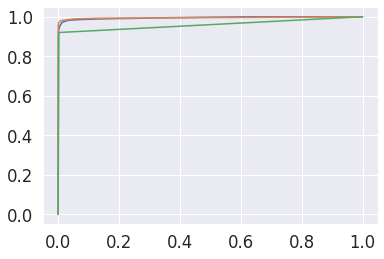

In [15]:
# Plot ROC curve and calculate and calculate AUC metric
roc_plot(models, X_train_ns, y_train_ns, X_test_ns, y_test_ns)

In [12]:
sns.set(font_scale=1.5)

def plot_conf_mat(model_dict, X_train, y_train, X_test, y_test):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    for name, model in tqdm(model_dict.items()):
      model.fit(X_train, y_train)
      y_preds = model.predict(X_test)
      fig, ax = plt.subplots(figsize=(3, 3))
      ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                      annot=True,
                      cbar=False ,fmt='g')
      plt.xlabel("True label")
      plt.ylabel("Predicted label")
      plt.title("%s Confusion Matrix" % name)
    
      bottom, top = ax.get_ylim()
      ax.set_ylim(bottom + 0.5, top - 0.5)
    

  0%|          | 0/5 [00:00<?, ?it/s]

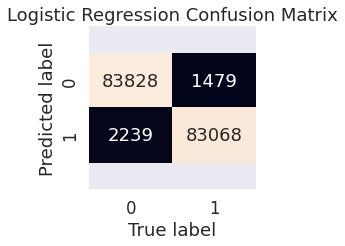

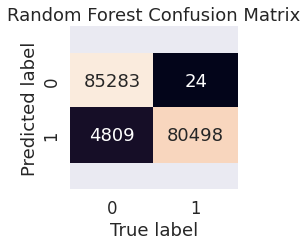

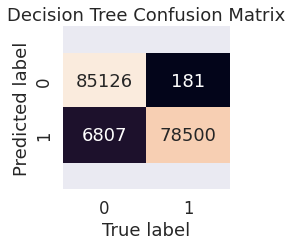

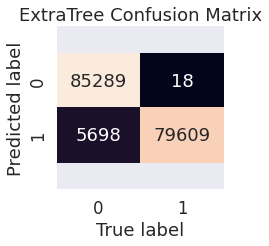

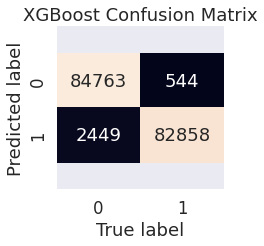

In [13]:
# Plot confusion matrices
plot_conf_mat(models, X_train_ns, y_train_ns, X_test_ns, y_test_ns)

  0%|          | 0/4 [00:00<?, ?it/s]

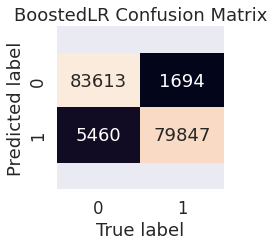

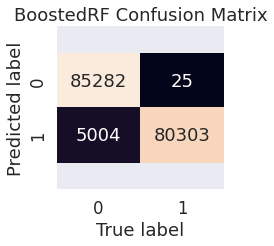

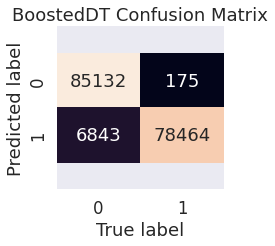

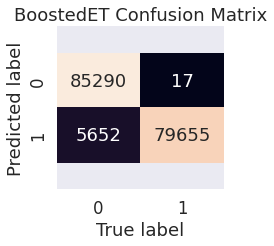

In [19]:
# Plot confusion matrices for boosted models
plot_conf_mat(boosted_models, X_train_ns, y_train_ns, X_test_ns, y_test_ns)

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
print(accuracy_score(y_test,y_pred))